# Inferential statistics
## Part III - Inferential Analysis

We're now going to look for answers to the ongoing basketball discussions between you and your family. The main ones we want to reasearch are the following:

- Your grandmother says that your sister couldn't play in a professional basketball league (not only the WNBA, but ANY professional basketball league) because she's too skinny and lacks muscle.
- Your sister says that most female professional players fail their free throws.
- Your brother-in-law heard on the TV that the average assists among NBA (male) and WNBA (female) players is 52 for the 2016-2017 season. He is convinced this average would be higher if we only considered the players from the WNBA.

Let's investigate these claims and see if we can find proof to refute or support them.

### Libraries
Import the necessary libraries first.

In [3]:
# Libraries
import math
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import ttest_1samp
pd.set_option('max_columns', 50)

### Load the dataset

Load the cleaned dataset.

In [4]:
#your code here
data = pd.read_csv('..\data\wnba_clean.csv', index_col='Unnamed: 0')
data

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,Experience,Games Played,MIN,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
0,Aerial Powers,DAL,F,183,71,21.200991,US,"January 17, 1994",23,Michigan State,2,8,173,30,85,35.3,12,32,37.5,21,26,80.8,6,22,28,12,3,6,12,93,0,0
1,Alana Beard,LA,G/F,185,73,21.329438,US,"May 14, 1982",35,Duke,12,30,947,90,177,50.8,5,18,27.8,32,41,78.0,19,82,101,72,63,13,40,217,0,0
2,Alex Bentley,CON,G,170,69,23.875433,US,"October 27, 1990",26,Penn State,4,26,617,82,218,37.6,19,64,29.7,35,42,83.3,4,36,40,78,22,3,24,218,0,0
3,Alex Montgomery,SAN,G/F,185,84,24.543462,US,"December 11, 1988",28,Georgia Tech,6,31,721,75,195,38.5,21,68,30.9,17,21,81.0,35,134,169,65,20,10,38,188,2,0
4,Alexis Jones,MIN,G,175,78,25.469388,US,"August 5, 1994",23,Baylor,R,24,137,16,50,32.0,7,20,35.0,11,12,91.7,3,9,12,12,7,0,14,50,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,Tiffany Hayes,ATL,G,178,70,22.093170,US,"September 20, 1989",27,Connecticut,6,29,861,144,331,43.5,43,112,38.4,136,161,84.5,28,89,117,69,37,8,50,467,0,0
139,Tiffany Jackson,LA,F,191,84,23.025685,US,"April 26, 1985",32,Texas,9,22,127,12,25,48.0,0,1,0.0,4,6,66.7,5,18,23,3,1,3,8,28,0,0
140,Tiffany Mitchell,IND,G,175,69,22.530612,US,"September 23, 1984",32,South Carolina,2,27,671,83,238,34.9,17,69,24.6,94,102,92.2,16,70,86,39,31,5,40,277,0,0
141,Tina Charles,NY,F/C,193,84,22.550941,US,"May 12, 1988",29,Connecticut,8,29,952,227,509,44.6,18,56,32.1,110,135,81.5,56,212,268,75,21,22,71,582,11,0


# Question 1: Can my sister play in a professional female basketball league?

As we said, you grandmother is convinced that your sister couldn't play in a professional league because of her physique and weight (her weight is 67kg). 

To find an actual answer to the question we first need to know what's the average weight of a professional female basketball player. The data we have only refers to the WNBA league and not to every female professional basketball league in the world, therefore we have no way of actually calculating it.

Still, given that we do have *some* data we can **infer** it using a sample of players like the one we have. 

**How would you do it? Try and think about the requirements that your sample must satisfy in order to be used to infer the average weight. Do you feel it actually fulfills those requirements? Do you need to make any assumptions? We could calculate a confidence interval to do the inference, but do you know any other ways?**

In [54]:
# your answer here
# i thought of two ways of doing this:
# 1. T testing in whole data, removing outliers
sample1 = data[data['Weight'] < 105]
# apply the test to check p_value
sample1['Weight'].mean(), ttest_1samp(sample1['Weight'], 67)
# the pvalue is very low, therefore we cannot say that my sisters weight does not matter,
# so it will be less likely for her to join the wnba by her weight alone.

(78.64444444444445,
 Ttest_1sampResult(statistic=13.634350569439489, pvalue=4.30179510401205e-27))

In [55]:
# 2. T testing in lighter position
# i could also consider the sample by the position of the player, because, if it is more common
# that a player in a certain position is more skinny and shorter in a way it will play faster,
# then my sister would probably apply for that specific position
# so, here we go:
position = pd.pivot_table(data, columns='Pos').T
# the position that requires less weight is G, grabbing a sample
sample2 = data[data['Pos'] == 'G']
print(sample2['Weight'].mean(), ttest_1samp(sample2['Weight'], 67))
# the pvalue is still lower than 5%, but it is much higher than the sample 1, so my sister would have
# a better chance for the 'G' position.
position['Weight']

70.36363636363636 Ttest_1sampResult(statistic=3.317746962576128, pvalue=0.0016286590904061968)


Pos
C      91.960000
F      83.090909
F/C    85.916667
G      70.363636
G/F    77.615385
Name: Weight, dtype: float64

**Now that all the requirements have been taken into account, compute the confidence interval of the average weight with a confidence level of 95%.**

In [56]:
# your code here
# using both samples
stats.t.interval(0.95, loc=np.mean(sample1['Weight']), scale=stats.sem(sample1['Weight']),\
                 df = len(sample1)-1) , \
stats.t.interval(0.95, loc=np.mean(sample2['Weight']), scale=stats.sem(sample2['Weight']),\
                 df = len(sample2)-1)

((76.95527838968128, 80.33361049920761),
 (68.33102659891813, 72.39624612835459))

**What can you say about these results?**

In [57]:
#your-answer-here
# confirming what we found out with the pvalue:
# for the first sample the weights of the players in the sample will be between 77 and 80,
# with a 95% certainty, so her weight is further away from the mean, as we can confirm with
# the zscore bellow, decreasing considerably her chances.
# for the second sample, it is between 68 and 71 with a 95% certainty, being her weight closer to
# the mean (zscore), therefore increasing her chances.
# checking the z-score for my sister's weight:
(67 - np.mean(sample1['Weight']))/np.std(sample1['Weight']),\
(67 - np.mean(sample2['Weight']))/np.std(sample2['Weight'])

(-1.1778284960246013, -0.45148817522112605)

**If your sister weighs 67kg what would you tell your grandmother in regards to her assumption?**

In [58]:
#your-answer-here
# first we can say that we cannot disconsider my sister's weight (pvalue) for the samples
# considering all the positions, my sister's chance would be considerably lower than if she
# applied for the 'G' position, since her zscore is closer to the mean in that sample.
# although we can say with a 95% of confidence that she will probably not make to the wnba
# considering her weight alone, we cannot disregard her chances of her getting in since there
# is a considerable ammount of players under 68kg (almost 20%):
len(data[data['Weight'] <=67])/len(data['Weight'])

0.17391304347826086

## Bonus: Can you plot the probability distribution of the average weight, indicating where the critical region is?

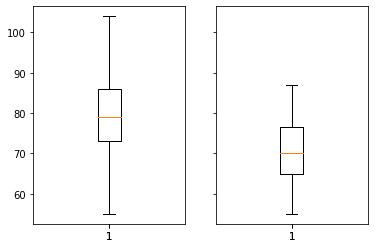

In [59]:
# your code here
fig, ax = plt.subplots(1,2, sharex=True, sharey=True)
ax[0].boxplot(sample1['Weight'])
ax[1].boxplot(sample2['Weight'])
plt.show()

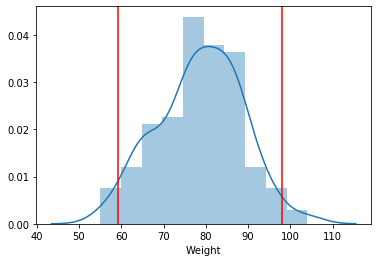

In [67]:
sns.distplot(sample1['Weight'])
plt.axvline(stats.norm.ppf(0.025, loc = np.mean(sample1['Weight']), scale=np.std(sample1['Weight'])),\
            color='red')
plt.axvline(stats.norm.ppf(0.975, loc = np.mean(sample1['Weight']), scale=np.std(sample1['Weight'])), \
            color='red')


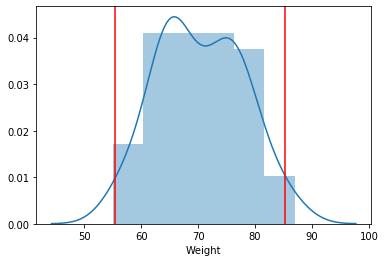

In [80]:
sns.distplot(sample2['Weight'])
plt.axvline(stats.t.ppf(0.025, loc = np.mean(sample2['Weight']), scale=np.std(sample2['Weight']), \
                        df=len(sample2['Weight']-1)), color='red')
plt.axvline(stats.t.ppf(0.975, loc = np.mean(sample2['Weight']), scale=np.std(sample2['Weight']), \
                        df=len(sample2['Weight']-1)), color='red')

# Question 2: Do female professional basketball players fail the majority of their free throws?

You do not agree with your sister when she says that most female players fail their free throws. You decide to try and estimate the percentage of players that fail more than 40% of their free throws using, you guessed it, the WNBA sample.

**How would you do it? Try and think about the requirements that your sample must satisfy in order to be used to infer the proportion of players that miss more than 40% of their free throws. Do you feel it actually fulfills those requirements? Do you need to make any assumptions?**

In [31]:
# your answer here
# first, choose the players with at least 1 free throw attempted:
dataf = data[data['FTA']>0]
# getting the mean of players with more than 40% miss:
miss = dataf[dataf['FT%'] < 60]
print(len(miss)/len(dataf))
# only 9 (6%) players from the sample missed more than 40% of their free throws
len(miss)

0.06766917293233082


9

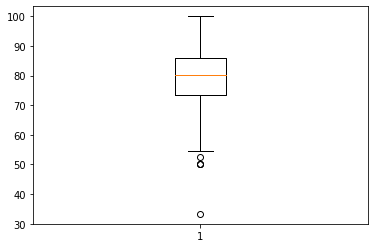

In [38]:
plt.boxplot(dataf['FT%'])
#taking out outliers:
dataff = dataf[dataf['FT%'] > 60]

{'whiskers': [<matplotlib.lines.Line2D at 0x21e46150e88>,
 'caps': [<matplotlib.lines.Line2D at 0x21e45f78f88>,
 'boxes': [<matplotlib.lines.Line2D at 0x21e46150b88>],
 'medians': [<matplotlib.lines.Line2D at 0x21e46167f88>],
 'fliers': [<matplotlib.lines.Line2D at 0x21e46167ac8>],
 'means': []}

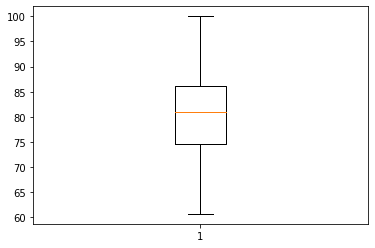

In [39]:
plt.boxplot(dataff['FT%'])

**Now that all the requirements have been taken into account, compute the confidence interval of the proportion with a confidence level of 95%:**

In [44]:
# your code here
stats.norm.interval(0.95, loc=np.mean(dataff['FT%']), scale=stats.sem(dataff['FT%']))

(78.74240091895507, 82.05114746814175)

**What can you comment about our result? What would you tell your sister?**

In [41]:
#your-answer-here
# with a 95% of confidence i can say that the free trhows will be a hit between 77% and 80% of the
# times, and that only 6% of the players in my sample missed more than 60% of the free throws.

# Bonus: Can you plot the probability distribution of the proportion of missed free throws, indicating where the critical region is?

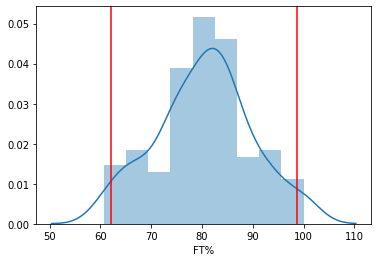

In [79]:
#your code here
sns.distplot(dataff['FT%'])
plt.axvline(stats.norm.ppf(0.025, loc = np.mean(dataff['FT%']), scale=np.std(dataff['FT%'])),\
            color='red')
plt.axvline(stats.norm.ppf(0.975, loc = np.mean(dataff['FT%']), scale=np.std(dataff['FT%'])), \
            color='red')

plt.show()

# Question 3: Is the average number of assists for WNBA players only higher than the average for WNBA and NBA players together?

Your brother-in-law is convinced that the average assists for female professional players is higher than the average of both female and male players combined (which is 52 for the 2016-2017 season). You would like to actually prove if this is true or not but you remember your stats teacher saying "you can't *prove* anything, you just can say that *you are not* saying foolishness".

**How would you do it? Try and think about the requirements that your sample must satisfy in order to do that. Do you feel it actually fulfills those requirements? Do you need to make any assumptions?**

In [33]:
#your-answer-here
# first do the ttest to see if the means are similar, than take the mean of the wnba assists and
# compare with the total (nba + wnba) assists
data['AST'].mean()
# since the mean is lower than the average of both assists means (nba+wnba), that suggests that the
# assists for the wnba are lower than for the nba.
data

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,Experience,Games Played,MIN,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
0,Aerial Powers,DAL,F,183,71,21.200991,US,"January 17, 1994",23,Michigan State,2,8,173,30,85,35.3,12,32,37.5,21,26,80.8,6,22,28,12,3,6,12,93,0,0
1,Alana Beard,LA,G/F,185,73,21.329438,US,"May 14, 1982",35,Duke,12,30,947,90,177,50.8,5,18,27.8,32,41,78.0,19,82,101,72,63,13,40,217,0,0
2,Alex Bentley,CON,G,170,69,23.875433,US,"October 27, 1990",26,Penn State,4,26,617,82,218,37.6,19,64,29.7,35,42,83.3,4,36,40,78,22,3,24,218,0,0
3,Alex Montgomery,SAN,G/F,185,84,24.543462,US,"December 11, 1988",28,Georgia Tech,6,31,721,75,195,38.5,21,68,30.9,17,21,81.0,35,134,169,65,20,10,38,188,2,0
4,Alexis Jones,MIN,G,175,78,25.469388,US,"August 5, 1994",23,Baylor,R,24,137,16,50,32.0,7,20,35.0,11,12,91.7,3,9,12,12,7,0,14,50,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,Tiffany Hayes,ATL,G,178,70,22.093170,US,"September 20, 1989",27,Connecticut,6,29,861,144,331,43.5,43,112,38.4,136,161,84.5,28,89,117,69,37,8,50,467,0,0
139,Tiffany Jackson,LA,F,191,84,23.025685,US,"April 26, 1985",32,Texas,9,22,127,12,25,48.0,0,1,0.0,4,6,66.7,5,18,23,3,1,3,8,28,0,0
140,Tiffany Mitchell,IND,G,175,69,22.530612,US,"September 23, 1984",32,South Carolina,2,27,671,83,238,34.9,17,69,24.6,94,102,92.2,16,70,86,39,31,5,40,277,0,0
141,Tina Charles,NY,F/C,193,84,22.550941,US,"May 12, 1988",29,Connecticut,8,29,952,227,509,44.6,18,56,32.1,110,135,81.5,56,212,268,75,21,22,71,582,11,0


40.507246376811594

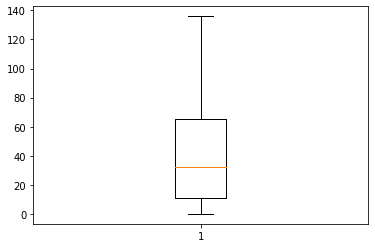

In [5]:
# but wait....
#plt.boxplot(data['AST'])
#outliers!! 
# even considering the position played, maybe we should count them off, since there are only 3
data = data[data['AST'] < 150]
plt.boxplot(data['AST'])
data['AST'].mean()

**Use a two-tailed one-sample t-test to see if we can reject (or not) the null hypothesis with a 95% confidence level.**

In [6]:
#your code here
ttest_1samp(data['AST'], 52)

Ttest_1sampResult(statistic=-3.9099063706517176, pvalue=0.00014464400397387215)

In [7]:
#your-answer-here
# we can reject the null hypothesis with more than 95% of confidence, so the means of assists are most
# likely different

**Now use a one-tailed one-sample t-test to see if we can reject (or not) the null hypothesis with a 95% confidence level.**

In [8]:
#your-answer-here
ttest_1samp(data['AST'], 52)[1]/2
# we can also reject the null hypothesis

7.232200198693608e-05

# Bonus: Can you plot the resulting t-distribution of both tests? Indicate where the is the critical region and where does your statistic fall.**

{'whiskers': [<matplotlib.lines.Line2D at 0x21e46a1efc8>,
 'caps': [<matplotlib.lines.Line2D at 0x21e46a23cc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x21e46a1e988>],
 'medians': [<matplotlib.lines.Line2D at 0x21e46a23e48>],
 'fliers': [<matplotlib.lines.Line2D at 0x21e46a29d08>],
 'means': []}

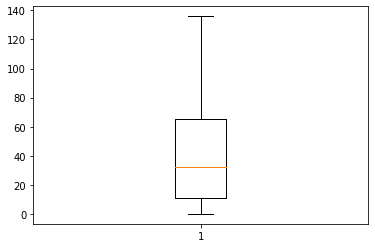

In [89]:
#your code here
# the critical region is within the box
plt.boxplot(data['AST'])

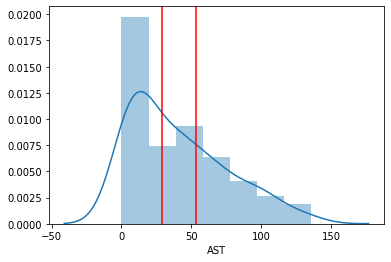

In [105]:
# two tailed
sns.distplot(data['AST'])
plt.axvline(stats.poisson.ppf(0.025, np.mean(data['AST'])),\
            color='red')
plt.axvline(stats.poisson.ppf(0.975, np.mean(data['AST'])), \
            color='red')
plt.show()
#this does not feel right

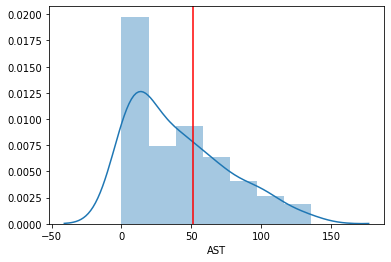

In [103]:
# one tailed
sns.distplot(data['AST'])
plt.axvline(stats.poisson.ppf(0.95, np.mean(data['AST'])), color='red')
plt.show()
# what have i done worng?

# Bonus: Satisfying your curiosity

You finally managed to solve your family's debates over basketball! While you were doing that you started to take an interest in the normal distribution.

You read that the normal distribution is present in a lot of natural phenomenons, like blood pressure, IQ, weight and height. If, for example, we could plot the distribution of the weights of every human on the planet right now it would have the shape of a normal distribution.

In light of this you would like to see if it's possible to check if the distribution of the weights of the WNBA players is a sample distribution that comes from a population that has a normal distribution, because theoretically this should be the case.

**How would you try to demonstrate that our sample fits a normal distribution? What kind of test would you use? Would you have to make any assumptions?**

In [2]:
#your-answer-here
# We can take the sample from exercise one (sample1) where I already disconsidered the outliers.
# Then create a sample that is a normal distribution and check the null hypothesis.

In [108]:
# your code here
normal = stats.norm.rvs(loc=np.mean(sample1['Weight']), scale = np.std(sample1['Weight']),\
        size = len(sample1['Weight']))
stats.ttest_ind(normal, sample1['Weight'])

Ttest_indResult(statistic=-0.6309219679900496, pvalue=0.5286292262901092)

**What are your comments in regards to the results of the test?**

In [23]:
#your-answer-here
# since we have a high p_value, the null hypothesis cannot be rejected, therefore, we cannot say
# that it is not a normal distribution. It also means that both have similar values.